*Представьте, что вы устроились на работу в кадровое агентство, которое подбирает вакансии для IT-специалистов. Ваш первый проект — создание модели машинного обучения, которая будет рекомендовать вакансии клиентам агентства, претендующим на позицию Data Scientist. Сначала вам необходимо понять, что из себя представляют данные и насколько они соответствуют целям проекта. В литературе эта часть работы над ML-проектом называется Data Understanding, или анализ данных.*

***Наш проект включает в себя несколько этапов:***
- знакомство с данными;
- предварительный анализ данных;
- детальный анализ вакансий;
- анализ работодателей;
- предметный анализ.

*Каждая из частей будет состоять из блока практических заданий, которые вам необходимо выполнить в своих Jupyter-ноутбуках, и контрольных вопросов на платформе, которые проверяются автоматически.*

*Также вам предстоит отправить свой код ментору для код-ревью. Вам будет предоставлен ноутбук-шаблон и требования, согласно которым вы должны оформить своё решение.*

***Требования к оформлению ноутбука-решения:***

- Решение оформляется только в Jupyter Notebook.
- Решение оформляется в соответствии с ноутбуком-шаблоном.
- Каждое задание выполняется в отдельной ячейке, выделенной под задание (в шаблоне они помечены как ваш код здесь). Не следует создавать много ячеек для решения задачи — это провоцирует неудобства при проверке.
- Текст SQL-запросов и код на Python должны быть читаемыми. Не забывайте про отступы в SQL-коде.
- Выводы по каждому этапу оформляются в формате Markdown в отдельной ячейке (в шаблоне они помечены как ваши выводы здесь).
- Выводы можно дополнительно проиллюстрировать с помощью графиков. Они оформляются в соответствии с теми правилами, которые мы приводили в модуле по визуализации данных.
- Не забудьте удалить ячейку с данными соединения перед фиксацией работы в GitHub.

### Знакомство с данными

*Все необходимые таблицы находятся в схеме public базы данных project_sql (именно эту базу вам необходимо указать в параметре dbname при подключении).*

*То есть параметры подключения будут следующими:*

In [20]:
import psycopg2
import pandas as pd

In [21]:
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

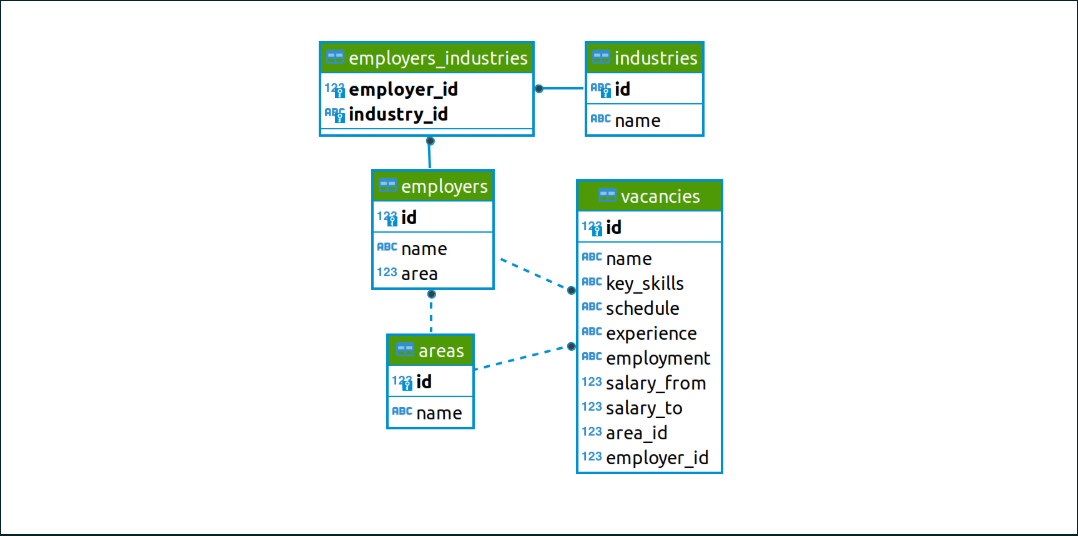

### vacancies

*Таблица хранит в себе данные по вакансиям и содержит следующие столбцы:*

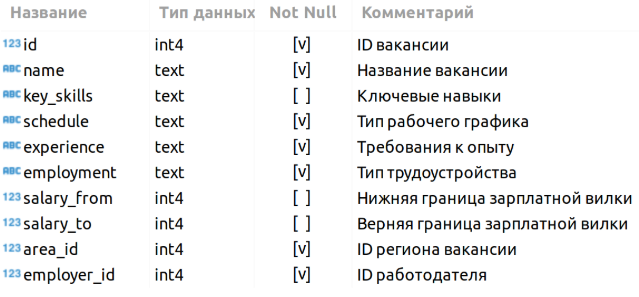

*Зарплатная вилка — это верхняя и нижняя граница оплаты труда в рублях (зарплаты в других валютах уже переведены в рубли). Соискателям она показывает, в каком диапазоне компания готова платить сотруднику на этой должности.*

### areas

*Таблица-справочник, которая хранит код региона и его название.*

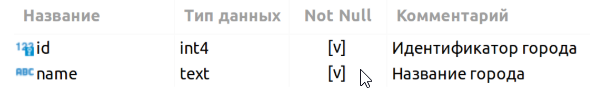

### employers

*Таблица-справочник со списком работодателей.*

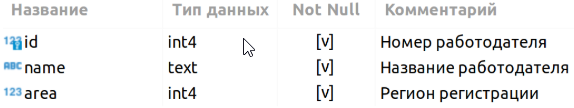

### industries

*Таблица-справочник вариантов сфер деятельности работодателей.*

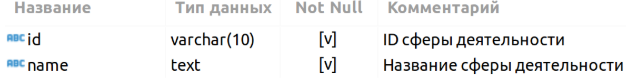

### employers_industries

*Дополнительная таблица, которая существует для организации связи между работодателями и сферами их деятельности.*

*Эта таблица нужна нам, поскольку у одного работодателя может быть несколько сфер деятельности (или работодатели могут вовсе не указать их). Для удобства анализа необходимо хранить запись по каждой сфере каждого работодателя в отдельной строке таблицы.*

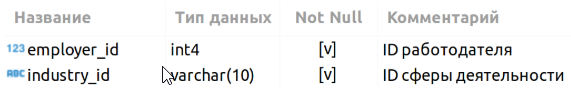

In [23]:
connection = psycopg2.connect(
   dbname=DBNAME,
   user=USER,
   host=HOST,
   password=PASSWORD,
   port=PORT
)

In [31]:
n = 15
query = f'''select *
           from public.vacancies
           limit {n}
        '''

In [32]:
df = pd.read_sql_query(query, connection)
df

C:\Users\User\AppData\Local\Temp\ipykernel_11160\137330334.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,id,name,key_skills,schedule,experience,employment,salary_from,salary_to,area_id,employer_id
0,55312386,Компьютерный Мастер,Пользователь ПК\tРабота в команде\tРемонт ноут...,Полный день,Нет опыта,Полная занятость,64000.0,NaN,1516,5724811
1,55843014,Системный администратор,Средства криптографической защиты информации\t...,Полный день,От 3 до 6 лет,Полная занятость,NaN,NaN,130,4903713
2,54525964,Lead Java Developer to Poland,Spring Framework\tSQL\tHibernate ORM\tJava\tGit,Удаленная работа,От 3 до 6 лет,Полная занятость,NaN,NaN,160,69961
3,54525965,Lead Java Developer to Poland,Spring Framework\tSQL\tHibernate ORM\tJava\tGit,Удаленная работа,От 3 до 6 лет,Полная занятость,NaN,NaN,159,69961
4,55354053,Специалист службы поддержки с техническими зна...,None,Удаленная работа,Нет опыта,Частичная занятость,15000.0,NaN,1955,1740
5,55906072,Корректор,Корректура текстов\tГрамотность\tРабота в кома...,Полный день,Нет опыта,Полная занятость,NaN,NaN,2323,584934
6,55523207,React Front-end Middle Developer,JavaScript\tTypeScript\tCSS3\tNode.js\tHTML5,Гибкий график,От 1 года до 3 лет,Полная занятость,NaN,NaN,2759,204511
7,55050261,Инженер-программист,Java SE\tSpring Framework\tSpring Boot\tGit\tS...,Полный день,Нет опыта,Полная занятость,40000.0,60000.0,49,4448636
8,55583432,Системный администратор,Linux\tАдминистрирование сетевого оборудования...,Полный день,От 1 года до 3 лет,Полная занятость,50000.0,NaN,3,55126
9,55312414,Ведущий специалист группы разработки систем,1С программирование\t1С: Предприятие 8\t1С: До...,Полный день,От 3 до 6 лет,Полная занятость,NaN,NaN,47,1413754


In [ ]:
#для Project 2
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432